### Linear Regression
* You’ll learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. 
* You’ll then learn how to fit simple linear regression models with numeric and categorical explanatory variables, and how to describe the relationship between the response and explanatory variables using model coefficients.

* Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


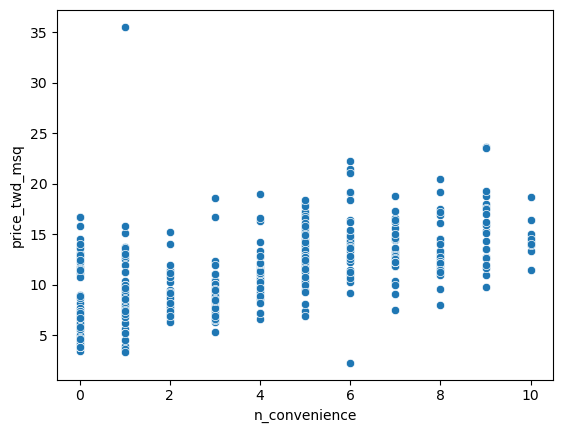

In [4]:
# Pandas for data pull
import pandas as pd

# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

taiwan_real_estate = pd.read_csv('../Datasets/taiwan_real_estate2.csv')

display(taiwan_real_estate.head())

# # Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None)

# Show the plot
plt.show()

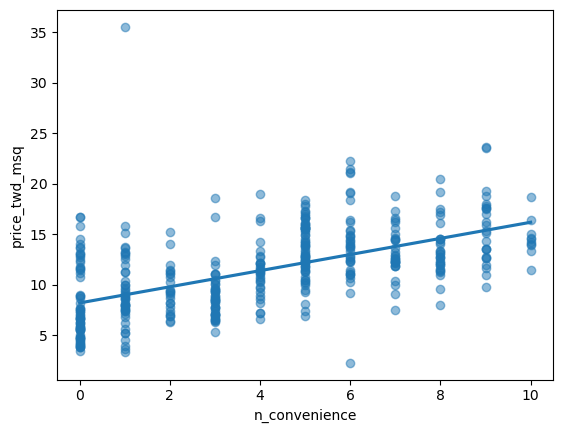

In [5]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

### Fitting a linear regression
* Linear regression models always fit a straight line to the data. Straight lines are defined by two properties: their intercept and their slope.
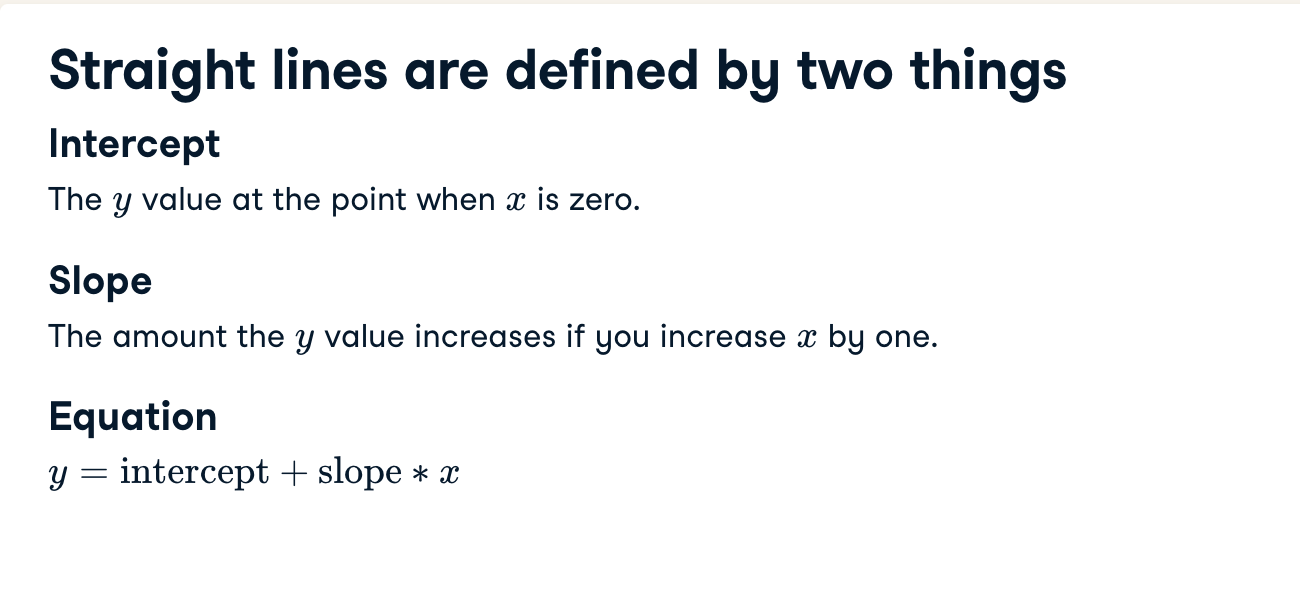

#### Fitting and Interpreting Model Coefficients
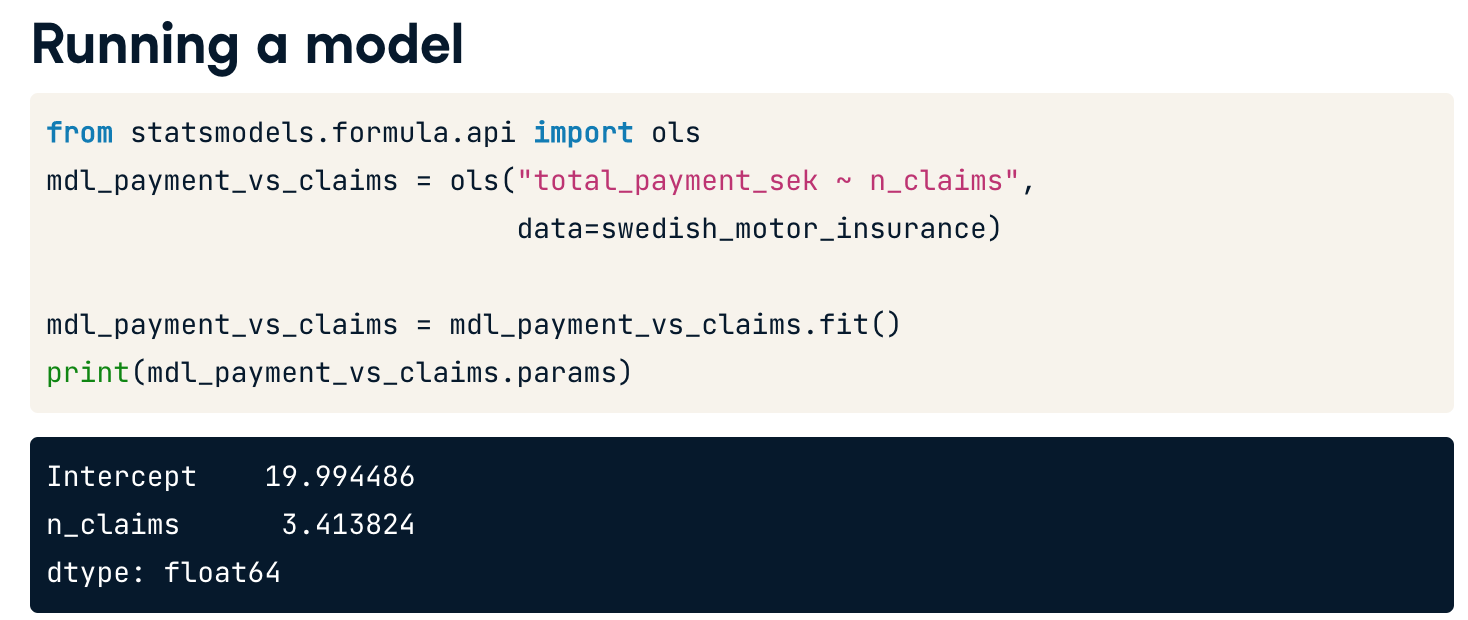

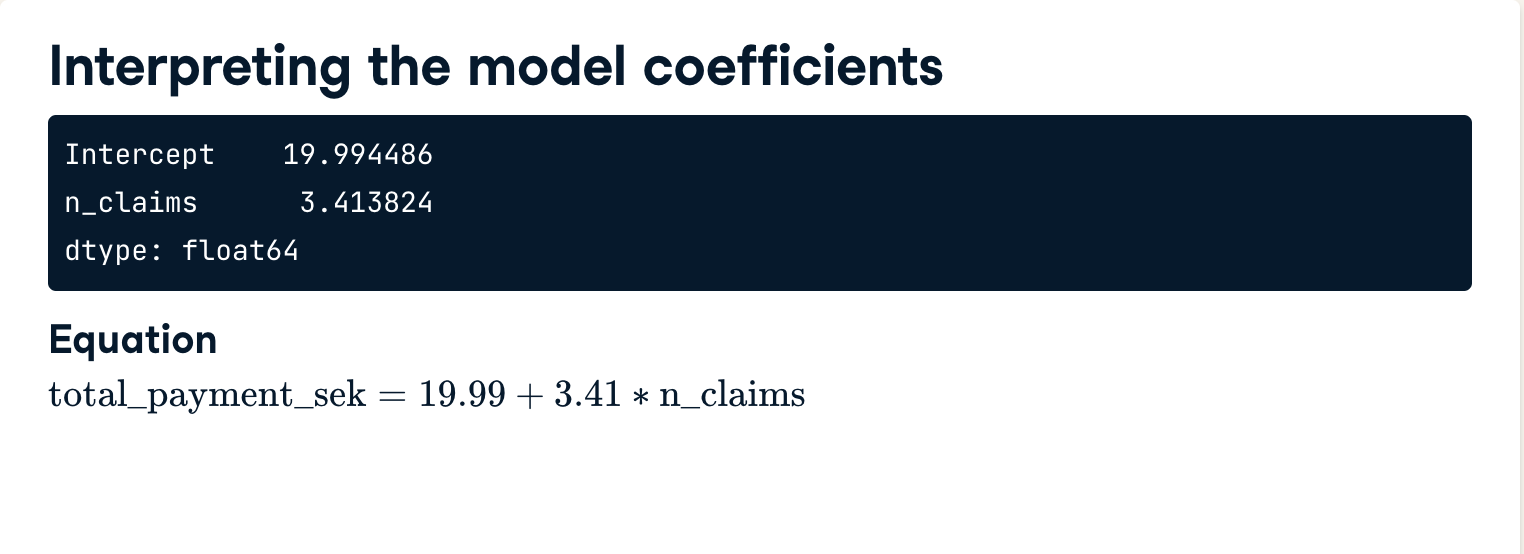

* To run a linear regression model, you import the ols function from statsmodels dot formula dot api. `OLS` stands for ordinary least squares, which is a type of regression, and is commonly used. The function ols takes two arguments. The **first argument** is a formula: the response variable is written to the left of the tilde, and the explanatory variable is written to the right. The data argument takes the DataFrame containing the variables.

* To actually fit the model, you add the dot fit() method to your freshly created model object. When you print the resulting model, it's helpful to use the params attribute, which contains the model's parameters. This will result in two coefficients. These coefficients are the `intercept` and `slope` of the straight line.

#### Linear Regression with OLS
* While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

In [6]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


* The model had an `Intercept` coefficient of **8.2242**. What does this mean?
    * On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.
* The model had an `n_convenience coefficient` of **0.7981**. What does this mean (aka slope)?
    * If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

### Categorical explanatory variables
* Let's take a look at some data on the masses of fish sold at a fish market. Each row of data contains the species of a fish, and its mass. The mass will be the response variable.
* Let's run a linear regression using mass as the response variable and species as the explanatory variable. The syntax is the same: you call ols(), passing a formula with the response variable on the left and the explanatory variable on the right, and setting the data argument to the DataFrame. 
    * We fit the model using the fit method, and retrieve the parameters using dot params on the fitted model. 
    * This time we have four coefficients: an intercept, and one for three of the fish species. A coefficient for bream is missing, but the number for the intercept looks familiar. The intercept is the mean mass of the bream that you just calculated. You might wonder what the other coefficients are, and why perch has a negative coefficient, since fish masses can't be negative.

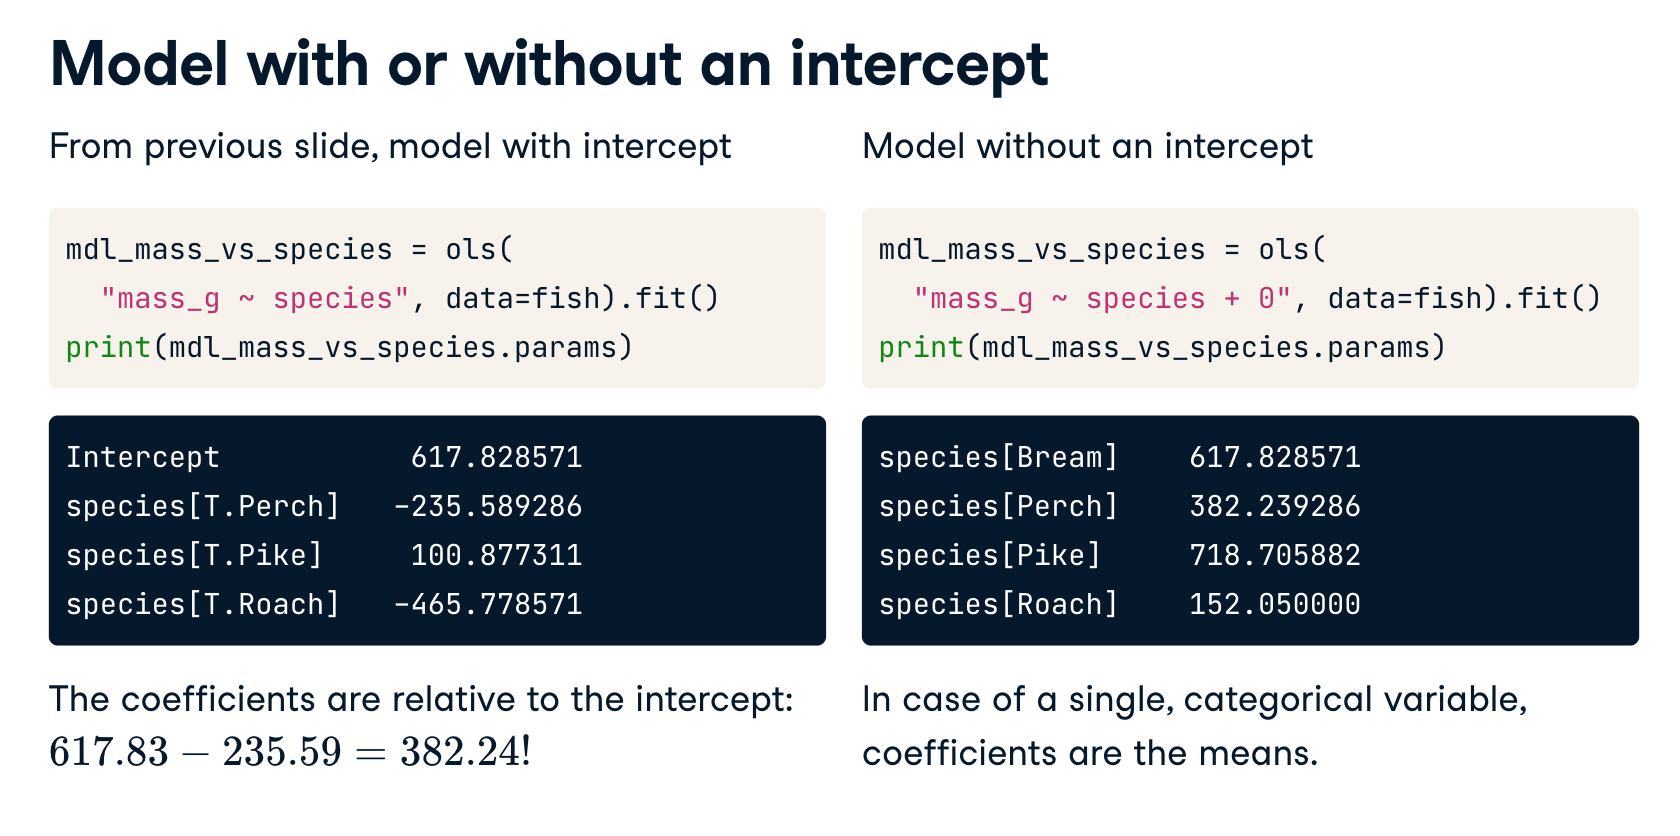
* The coefficients for each category are calculated relative to the intercept. 
    * This way of displaying results can be useful for models with multiple explanatory variables, but for simple linear regression, it's just confusing. 
* Fortunately, we can fix it. By changing the formula slightly to append "plus zero", we specify that all the coefficients should be given relative to zero. 
    * Equivalently, it means we are fitting a linear regression without an intercept term. 
    * If you subtract two hundred and thirty five point fifty-nine from six hundred and seventeen point eighty-three, you get three hundred and eighty two point twenty four, which is the mean mass of a perch. 
* Now these coefficients make more sense. They are all just the mean masses for each species. This is a reassuringly boring result. When you only have a single, categorical explanatory variable, the linear regression coefficients are simply the means of each category.

#### Visualizing numeric vs categorical
* If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

* The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

0 to 15     190
15 to 30    129
30 to 45     95
Name: house_age_years, dtype: int64


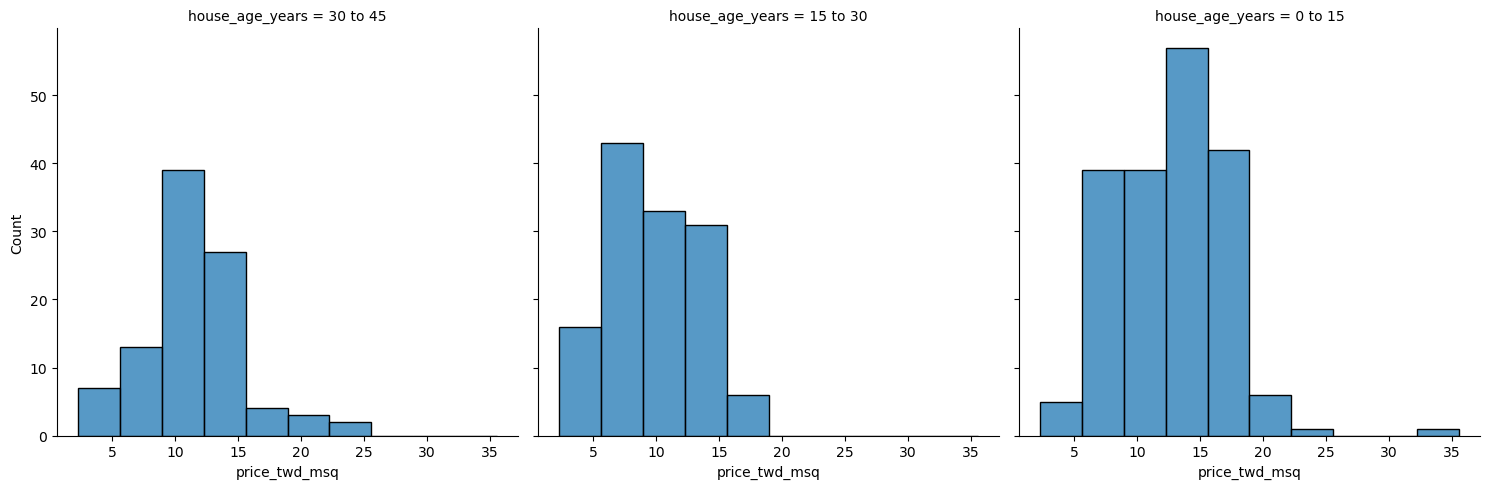

In [8]:
# Lets look at the column values to see how many histograms will appear
print(taiwan_real_estate['house_age_years'].value_counts())

# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         bins=10,
         col='house_age_years')

# Show the plot
plt.show()

* It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

In [11]:
## Calculate Means by Category

# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


#### Linear regression with a categorical explanatory variable

In [12]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


* Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0

In [13]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
